## 프로젝트: Vocabulary Size를 변경해서 시도해보기


In [1]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 라이브러리 불러오기

사용할 모델

나이브 베이즈 분류기, CNB, 로지스틱 회귀, 서포트 벡터 머신, 결정 트리, 랜덤 포레스트, 그래디언트 부스팅 트리, 보팅

In [36]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산

## 데이터 불러오기

In [39]:
def load_data(num_words):
    (x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=num_words, test_split=0.2)
    
    word_index = reuters.get_word_index(path = 'reuters_word_index.json')
    index_to_word = {idx+3:word for word, idx in word_index.items()}
    
    for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
        index_to_word[index]=token
    
    decoded = []
    for i in range(len(x_train)):
        temp = ' '.join([index_to_word[idx] for idx in x_train[i]])
        decoded.append(temp)
    x_train = decoded
    
    decoded = []
    for i in range(len(x_test)):
        temp = ' '.join([index_to_word[idx] for idx in x_test[i]])
        decoded.append(temp)
    x_test = decoded
    
    return (x_train, y_train), (x_test, y_test), word_index, index_to_word

## 데이터 벡터화

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

def vectorization(x_train, x_test):
    dtmv = CountVectorizer()
    x_train_dtm = dtmv.fit_transform(x_train)
    x_test_dtm = dtmv.transform(x_test)
    
    tfidf_transformer = TfidfTransformer()
    tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
    tfidf_test = tfidf_transformer.transform(x_test_dtm)
    
    return tfidfv, tfidf_test

## 모델 성능 측정(Accuracy)

In [52]:
def get_model_accuracy(model, tfidfv, y_train, tfidfv_test, y_test):
    model.fit(tfidfv, y_train)
    predicted = model.predict(tfidfv_test)
    accuracy = accuracy_score(y_test, predicted)
    
    return accuracy

In [55]:
num_words_list = [20000, 10000, 5000]

model_dic = {'MultinomialNB': MultinomialNB(),
             'ComplementNB' : ComplementNB(),
             'LogisticRegression' :LogisticRegression(C=10000, penalty='l2', max_iter=3000),
             'LinearSVC' : LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False),
             'DecisionTreeClassifier' : DecisionTreeClassifier(max_depth=10, random_state=0),
             'RandomForestClassifier' : RandomForestClassifier(n_estimators=5, random_state=0),
             'GradientBoostingClassifier' : GradientBoostingClassifier(random_state=0, verbose=0),
             'VotingClassifier' : VotingClassifier(estimators=[('lr', LogisticRegression(C=10000, max_iter=3000, penalty='l2')),
                                           ('cb', ComplementNB()),
                                           ('grbt', GradientBoostingClassifier(random_state=0))], 
                               voting='soft')
             }

accuracy = []

for num_words in num_words_list:
    (x_train, y_train), (x_test, y_test), word_index, index_to_word = load_data(num_words)
    
    tfidfv, tfidfv_test = vectorization(x_train, x_test)
    print(tfidfv.shape)
    temp = []
    for model_name, model in model_dic.items() :
        acc = get_model_accuracy(model, tfidfv, y_train, tfidfv_test, y_test)
        temp.append(acc)
        print(model_name, ':', acc)
    accuracy.append(temp)
    print('')
    

(8982, 18479)
MultinomialNB : 0.6193232413178985
ComplementNB : 0.7671415850400712
LogisticRegression : 0.8156723063223509


C:\Users\juwon\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC : 0.7929652715939448
DecisionTreeClassifier : 0.6211041852181657
RandomForestClassifier : 0.6714158504007124
GradientBoostingClassifier : 0.7702582368655387
VotingClassifier : 0.8192341941228851

(8982, 9670)
MultinomialNB : 0.6567230632235085
ComplementNB : 0.7707034728406055
LogisticRegression : 0.8107747105966162


C:\Users\juwon\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC : 0.790293855743544
DecisionTreeClassifier : 0.6202137132680321
RandomForestClassifier : 0.674087266251113
GradientBoostingClassifier : 0.7666963490650045
VotingClassifier : 0.8165627782724845

(8982, 4867)
MultinomialNB : 0.6731967943009796
ComplementNB : 0.7707034728406055
LogisticRegression : 0.8036509349955476


C:\Users\juwon\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC : 0.769813000890472
DecisionTreeClassifier : 0.6179875333926982
RandomForestClassifier : 0.701246660730187
GradientBoostingClassifier : 0.7671415850400712
VotingClassifier : 0.8098842386464826



In [64]:
num_words_accuracy = {}
for num_words, acc in zip(num_words_list,accuracy):
    num_words_accuracy.update({num_words:acc})

In [68]:
import pandas as pd
model_index = [model for model in model_dic.keys()]
acc_data = pd.DataFrame(num_words_accuracy, index = model_index)
acc_data

,20000,10000,5000
MultinomialNB,0.619323,0.656723,0.673197
ComplementNB,0.767142,0.770703,0.770703
LogisticRegression,0.815672,0.810775,0.803651
LinearSVC,0.792965,0.790294,0.769813
DecisionTreeClassifier,0.621104,0.620214,0.617988
RandomForestClassifier,0.671416,0.674087,0.701247
GradientBoostingClassifier,0.770258,0.766696,0.767142
VotingClassifier,0.819234,0.816563,0.809884


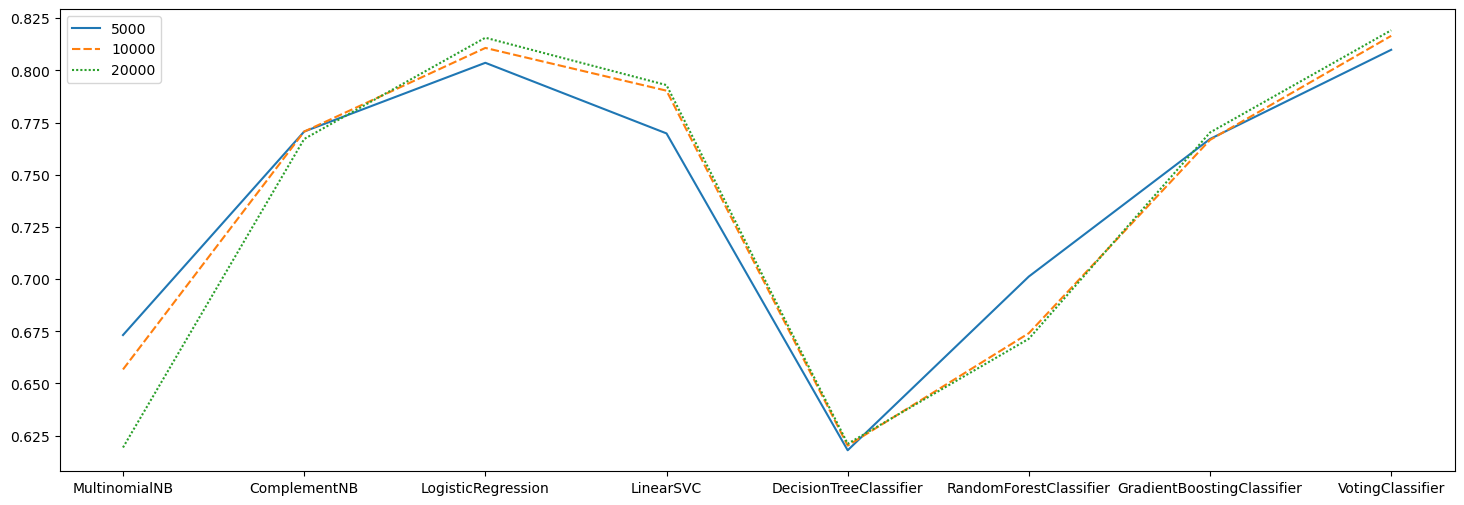

In [71]:
plt.figure(figsize=(18,6))
sns.lineplot(acc_data)
plt.show()

In [46]:
from sklearn.metrics import classification_report
num_words_list = [20000, 10000, 5000]

for num_words in num_words_list:
    (x_train, y_train), (x_test, y_test), word_index, index_to_word = load_data(num_words)
    
    tfidfv, tfidfv_test = vectorization(x_train, x_test)
    model =MultinomialNB()
    model.fit(tfidfv,y_train)
    predicted = model.predict(tfidfv_test)
    print(classification_report(y_test,predicted, zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.79      0.39      0.52       105
           2       0.00      0.00      0.00        20
           3       0.75      0.92      0.82       813
           4       0.46      0.96      0.62       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.04      0.08        25
          10       0.00      0.00      0.00        30
          11       0.76      0.37      0.50        83
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.74      0.28      0.41        99
          17       0.00    

## LSTM과 비교해보기

In [50]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=20000, test_split=0.2)

In [51]:
word_index = reuters.get_word_index()
index_to_word = {idx+3:word for word,idx in word_index.items()}
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index]=token

뉴스 기사 최대 길이:  2376
뉴스 기사 평균 길이:  145.96419665122906


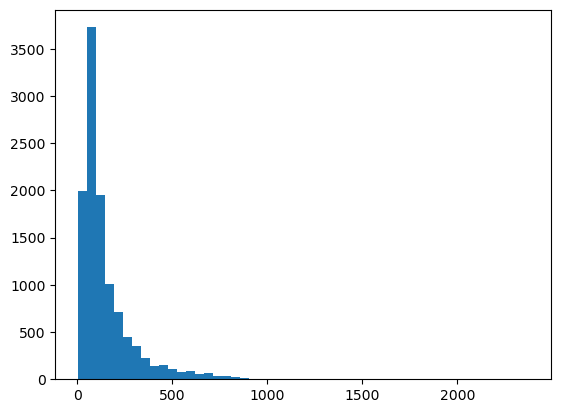

In [52]:
total_list = list(x_train) + list(x_test)

print('뉴스 기사 최대 길이: ',max(len(sen) for sen in total_list))
print('뉴스 기사 평균 길이: ',sum(len(sen) for sen in total_list) / len(total_list))
len_sen = np.array([len(sen) for sen in total_list])
plt.hist(len_sen ,bins = 50)
plt.show()

In [53]:
max_len = 350
print('길이 제한 후 제한 전과의 비율: ', np.sum(len_sen < max_len) / len(total_list))

길이 제한 후 제한 전과의 비율:  0.9152119700748129


In [54]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
num_classes = 46

x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, padding='pre', maxlen = max_len)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, padding='pre', maxlen = max_len)

y_train = tf.one_hot(y_train, num_classes)
y_test = tf.one_hot(y_test, num_classes)

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding,Dropout,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

vocab_size = 20000
embedding_dim = 128
hidden_units = 256
dropout=0.5
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
# model.add(LSTM(hidden_units,return_sequences=True))
# model.add(Dropout(dropout))
# model.add(LSTM(hidden_units,return_sequences=True))
# model.add(Dropout(dropout))

model.add(LSTM(hidden_units))
model.add(Dropout(dropout))
# model.add(Dense(hidden_units, activation='relu'))


model.add(Dense(num_classes, activation = 'softmax'))

es = EarlyStopping(monitor = 'val_loss', patience = 3)
mc = ModelCheckpoint('bestmodel.h5',monitor ='val_accuracy', save_best_only=True)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train, 
                    epochs = 30, 
                    batch_size = 128, 
                    callbacks = [es, mc],
                    validation_data=(x_test,y_test))

Epoch 1/30
71/71 [==============================] - 4s 46ms/step - loss: 2.5224 - accuracy: 0.3484 - val_loss: 2.0187 - val_accuracy: 0.4938
Epoch 2/30
71/71 [==============================] - 3s 41ms/step - loss: 2.0003 - accuracy: 0.4680 - val_loss: 2.1256 - val_accuracy: 0.4559
Epoch 3/30
71/71 [==============================] - 3s 42ms/step - loss: 1.8495 - accuracy: 0.5065 - val_loss: 1.7454 - val_accuracy: 0.5454
Epoch 4/30
71/71 [==============================] - 3s 42ms/step - loss: 1.5936 - accuracy: 0.5713 - val_loss: 1.7253 - val_accuracy: 0.5361
Epoch 5/30
71/71 [==============================] - 3s 43ms/step - loss: 1.4359 - accuracy: 0.6096 - val_loss: 1.8366 - val_accuracy: 0.5606
Epoch 6/30
71/71 [==============================] - 3s 44ms/step - loss: 1.4222 - accuracy: 0.6207 - val_loss: 1.6091 - val_accuracy: 0.5917
Epoch 7/30
71/71 [==============================] - 3s 44ms/step - loss: 1.2332 - accuracy: 0.6681 - val_loss: 1.6853 - val_accuracy: 0.5770
Epoch 8/30
71

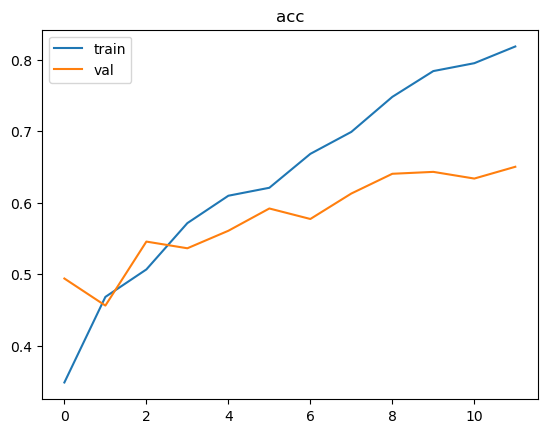

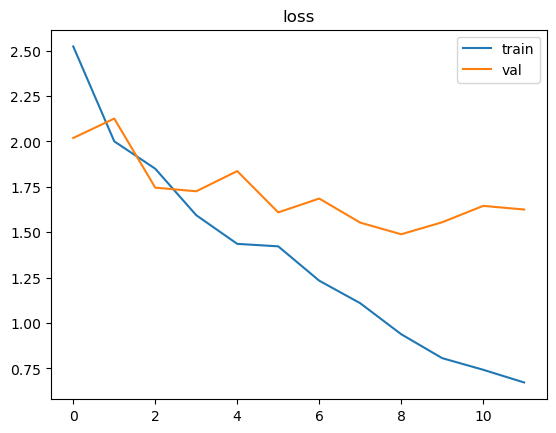

In [64]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(acc, label ='train')
plt.plot(val_acc, label ='val')
plt.title('acc')
plt.legend()
plt.show()

plt.plot(loss, label='train')
plt.plot(val_loss, label ='val')
plt.title('loss')
plt.legend()
plt.show()

## 평가

이번 실습에서는 머신러닝 모델 8가지를 사용하여 단어장 크기에 따른 모델성능을 비교해보았다.
모델 8가지는 나이브 베이즈 분류기, CNB, 로지스틱 회귀, 서포트 벡터 머신, 결정 트리, 랜덤 포레스트, 그래디언트 부스팅 트리, 보팅을 사용하였다. 
단어장의 크기는 20000, 10000, 5000으로 정하였다.

1. 단어장크기가 커질수록 나이브베이즈, CNB, 랜덤포레스트는 성능이 떨어졌다. 나이브베이즈는 성능이 10%정도(67 > 61) 유독 많이 떨어졌다.

2. 성능의 증가폭, 감소폭은 단어장 크기 10000이상 일 때 그 정도가 감소하였다.

3. 로지스틱 회귀와 보팅의 성능이 82%로 가장 높았다.

딥러닝은 단어장의 크기는 20000과 5000으로 진행하였고, padding은 pre와 post로 진행하였다.

1. 단어장의 크기와 상관없이 65%에서 더 올라가지 않았다.

2. padding의 경우 pre의 성능이 post보다 두배정도 높았다. post의경우 가장 높은 정확도가 37%밖에 안되었다.

3. 층의 깊이는 깊을 수록 과적합이 일어나서 금방 훈련이 종료되었고 정확도도 5%가량 낮았다.